Adaptar la tasa de aprendizaje para su procedimiento de optimización de stochastic gradient descent puede aumentar el rendimiento y reducir el tiempo de entrenamiento

En este capitulo se analizara las formas de optimizar un entrenamiento, principalmente los cambios que se pueden realizar al learning rate segun los parametros de tiempo de convergencia y la magnitud del "paso".
Por default se tiene un learning rate constante, pero el train podria mejorar si este se va cambiando a traves de cada epoch.

La adaptación más sencilla y quizas las más utilizada es reducir el learning rate en función del paso del tiempo. Esto tiene el efecto de aprender rápidamente buenos pesos al principio y afinarlos más tarde. 

Dos esquemas de tasa de aprendizaje populares y fáciles de usar son los siguientes:
* Disminuir la tasa de aprendizaje gradualmente en función de la época.
* Disminuir la tasa de aprendizaje mediante grandes caídas puntuales en determinadas épocas.

## Esquema de la tasa de aprendizaje por tiempo

Keras tiene implementado una funcion de decaimiento dentro de la clase SGD la cual implementa el algoritmo de stochastic gradient descent. 

La ecuación de la tasa de aprendizaje basada en el tiempo como sigue:

$$LearningRate_{new}(decay,epoch) = \frac{LearningRate_{old}}{1 + decay \times epoch}$$

Si $decay=0$ el learning rate va a ser igual independiente de la epoca 

In [1]:
#learning_rate_init=0.1
decay=0.001
learning_rate_history=[0.1]
for epoch in range(1,101):
    learning_rate_old=learning_rate_history[epoch-1]
    learning_rate_history.append(learning_rate_old/(1+decay*epoch))


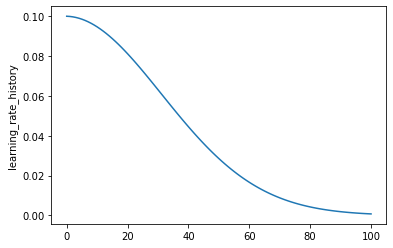

In [2]:
import matplotlib.pyplot as plt
plt.plot(learning_rate_history)
plt.ylabel('learning_rate_history')
plt.show()

Puede crear un buen programa por defecto estableciendo el valor de decaimiento de la siguiente manera:

$$
Decay = \frac{LearningRate} {Epochs} \;
$$
If $learningrate = 0.1$ y $epochs=100$:
$$ Decay = \frac{0.1}{100} \ =>\ Decay = 0.001$$


In [3]:
import pandas 
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

Using TensorFlow backend.


In [4]:
# load dataset
dataframe = pandas.read_csv("C:/Users/joaqu/Desktop/proyecto/ensayos/datos/ionosphere.data", sep=",",header=None)
dataset = dataframe.values
X = dataset[:,:34]
Y = dataset[:,34]


In [5]:
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [6]:
# create model
model = Sequential()
model.add(Dense(34, input_dim=34, kernel_initializer= "normal" , activation= "relu" ))
model.add(Dense(1, kernel_initializer= "normal" , activation= "sigmoid" ))

model2 = Sequential()
model2.add(Dense(34, input_dim=34, kernel_initializer= "normal" , activation= "relu" ))
model2.add(Dense(1, kernel_initializer= "normal" , activation= "sigmoid" ))


In [7]:
# Compile model
epochs = 50
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss= "binary_crossentropy" , optimizer=sgd, metrics=[ "accuracy" ])

model2.compile(loss= "binary_crossentropy" , optimizer="adam", metrics=[ "accuracy" ])

In [8]:
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=epochs, batch_size=28, verbose=2)
model2.fit(X, Y, validation_split=0.33, epochs=50, batch_size=28, verbose=0)

Train on 235 samples, validate on 116 samples
Epoch 1/50
 - 0s - loss: 0.6810 - accuracy: 0.6553 - val_loss: 0.6393 - val_accuracy: 0.8448
Epoch 2/50
 - 0s - loss: 0.6368 - accuracy: 0.7149 - val_loss: 0.5248 - val_accuracy: 0.8190
Epoch 3/50
 - 0s - loss: 0.5561 - accuracy: 0.7915 - val_loss: 0.4423 - val_accuracy: 0.8793
Epoch 4/50
 - 0s - loss: 0.4734 - accuracy: 0.8213 - val_loss: 0.5963 - val_accuracy: 0.7759
Epoch 5/50
 - 0s - loss: 0.3977 - accuracy: 0.8723 - val_loss: 0.3466 - val_accuracy: 0.9310
Epoch 6/50
 - 0s - loss: 0.3100 - accuracy: 0.8979 - val_loss: 0.2150 - val_accuracy: 0.9569
Epoch 7/50
 - 0s - loss: 0.2745 - accuracy: 0.8979 - val_loss: 0.2383 - val_accuracy: 0.9569
Epoch 8/50
 - 0s - loss: 0.2406 - accuracy: 0.9149 - val_loss: 0.1959 - val_accuracy: 0.9655
Epoch 9/50
 - 0s - loss: 0.2161 - accuracy: 0.9149 - val_loss: 0.1453 - val_accuracy: 0.9569
Epoch 10/50
 - 0s - loss: 0.2045 - accuracy: 0.9149 - val_loss: 0.1139 - val_accuracy: 0.9655
Epoch 11/50
 - 0s - los

In [10]:
#model sin decaimiento 
scores2 = model2.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model2.metrics_names[1], scores2[1]*100))

accuracy: 93.73%


In [9]:
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 98.86%


## Drop-Based Learning Rate Schedule

Otra programación de la tasa de aprendizaje muy popular que se utiliza con los modelos de aprendizaje profundo es la de reducir sistemáticamente la tasa de aprendizaje en momentos específicos durante el entrenamiento. 
A menudo este método se implementa reduciendo la tasa de aprendizaje a la mitad cada número fijo de épocas.Por ejemplo, podemos tener una tasa de aprendizaje inicial de 0,1 y reducirla en un factor de 0,5 cada 10 épocas. 


In [11]:
#learning_rate_init=0.1
learning_rate_history=[0.1]
for epoch in range(1,101):
    learning_rate_old=learning_rate_history[epoch-1]
    if epoch%10==0:
        learning_rate_history.append(learning_rate_old*0.5)
    else: 
        learning_rate_history.append(learning_rate_old)


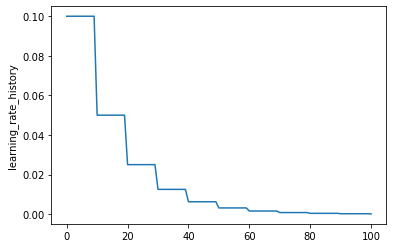

In [12]:
plt.plot(learning_rate_history)
plt.ylabel('learning_rate_history')
plt.show()

En el código siguiente, utilizamos el mismo ejemplo anterior de una red de una sola capa oculta en el conjunto de datos Ionosphere. 

Se define una nueva función step_decay() que implementa la ecuación: 

$$
LearningRate = InitialLearningRate \times DropRate^{ floor  (\frac{1+Epoch}{EpochDrop})}
$$
Donde:
* InitialLearningRate es la tasa de aprendizaje al principio de la ejecución
* EpochDrop es la frecuencia con la que se baja la tasa de aprendizaje en épocas 
* DropRate es cuánto se baja la tasa de aprendizaje cada vez que se baja.

In [13]:
from keras.callbacks import LearningRateScheduler
# learning rate schedule
def step_decay(epoch):
    import math
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

In [14]:
model3 = Sequential()
model3.add(Dense(34, input_dim=34, kernel_initializer= "normal" , activation= "relu" ))
model3.add(Dense(1, kernel_initializer= "normal" , activation= "sigmoid" ))

In [15]:
# Compile model
epochs = 50
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.9
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model3.compile(loss= "binary_crossentropy" , optimizer=sgd, metrics=[ "accuracy" ])
# learning schedule callback
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

In [16]:
model3.fit(X, Y, validation_split=0.33, epochs=epochs, batch_size=28,callbacks=callbacks_list, verbose=2)

Train on 235 samples, validate on 116 samples
Epoch 1/50
 - 0s - loss: 0.6779 - accuracy: 0.6723 - val_loss: 0.6047 - val_accuracy: 0.8621
Epoch 2/50
 - 0s - loss: 0.6132 - accuracy: 0.7191 - val_loss: 0.4900 - val_accuracy: 0.6810
Epoch 3/50
 - 0s - loss: 0.4989 - accuracy: 0.7830 - val_loss: 0.4254 - val_accuracy: 0.7672
Epoch 4/50
 - 0s - loss: 0.3710 - accuracy: 0.8468 - val_loss: 0.5097 - val_accuracy: 0.7759
Epoch 5/50
 - 0s - loss: 0.2810 - accuracy: 0.8894 - val_loss: 0.1666 - val_accuracy: 0.9655
Epoch 6/50
 - 0s - loss: 0.2266 - accuracy: 0.9064 - val_loss: 0.1600 - val_accuracy: 0.9655
Epoch 7/50
 - 0s - loss: 0.2108 - accuracy: 0.9234 - val_loss: 0.3837 - val_accuracy: 0.8103
Epoch 8/50
 - 0s - loss: 0.1869 - accuracy: 0.9362 - val_loss: 0.1372 - val_accuracy: 0.9828
Epoch 9/50
 - 0s - loss: 0.1857 - accuracy: 0.9447 - val_loss: 0.0750 - val_accuracy: 0.9741
Epoch 10/50
 - 0s - loss: 0.1664 - accuracy: 0.9532 - val_loss: 0.2045 - val_accuracy: 0.9310
Epoch 11/50
 - 0s - los

In [17]:
#model sin decaimiento 
scores3 = model3.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model3.metrics_names[1], scores3[1]*100)) 

accuracy: 99.43%


### Consejos 

**Aumente el ritmo de aprendizaje inicial.** Dado que la tasa de aprendizaje disminuirá, comience con un valor mayor para disminuir. Una tasa de aprendizaje mayor dará lugar a cambios mucho mayores en los pesos, al menos al principio, lo que le permitirá beneficiarse del ajuste fino más adelante.

**Utilice un impulso grande.** El uso de un valor de momentum mayor ayudará al algoritmo de optimización a seguir haciendo actualizaciones en la dirección correcta cuando su tasa de aprendizaje se reduzca a valores pequeños.

**Experimente con diferentes schedules.** No estará claro qué schedules de tasa de aprendizaje usar, así que pruebe algunos con diferentes opciones de configuración y vea lo que funciona mejor en su problema. También pruebe los schedules que cambian exponencialmente e incluso los programas que responden a la precisión de su modelo en los conjuntos de datos de entrenamiento o de prueba.